# LOADING LIBRARIES

In [1]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sn

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score

# LOADING DATA

In [4]:
data = yf.download(tickers ='EURUSD=X', start = '2013-12-13', end= '2022-11-11')

[*********************100%***********************]  1 of 1 completed


In [5]:
data['returns'] = (data['Adj Close']/data['Adj Close'].shift(1)) -1
data['returnsclass'] = [1 if data.returns[i]>0 else 0 for i in range(len(data))]

In [6]:
data.drop(['Volume'], axis=1, inplace=True)

In [7]:
data.dropna(inplace=True)

In [8]:
data_set = data.iloc[:, ]#.values
pd.set_option('display.max_columns', None)

data_set.head(5)

,Open,High,Low,Close,Adj Close,returns,returnsclass
Date,,,,,,,
2013-12-16,1.373815,1.379900,1.373815,1.373928,1.373928,-0.000838,0
2013-12-17,1.376178,1.378210,1.372701,1.376292,1.376292,0.001720,1
2013-12-18,1.377107,1.378099,1.373479,1.377126,1.377126,0.000606,1
2013-12-19,1.368307,1.369394,1.365113,1.368495,1.368495,-0.006268,0
2013-12-20,1.365598,1.370870,1.362583,1.365579,1.365579,-0.002130,0


In [9]:
data_set.drop(['returns'], axis=1, inplace=True)

In [10]:
data_set

,Open,High,Low,Close,Adj Close,returnsclass
Date,,,,,,
2013-12-16,1.373815,1.379900,1.373815,1.373928,1.373928,0
2013-12-17,1.376178,1.378210,1.372701,1.376292,1.376292,1
2013-12-18,1.377107,1.378099,1.373479,1.377126,1.377126,1
2013-12-19,1.368307,1.369394,1.365113,1.368495,1.368495,0
2013-12-20,1.365598,1.370870,1.362583,1.365579,1.365579,0
...,...,...,...,...,...,...
2022-11-04,0.974963,0.993818,0.974849,0.974963,0.974963,0
2022-11-07,0.992881,1.000500,0.991945,0.992881,0.992881,1
2022-11-08,1.001863,1.009418,0.997606,1.001863,1.001863,1


# SUPPORT VECTOR MACHINE

In [11]:
# Separate the features (historical prices and technical indicators) and the target (movement)
features = data_set.iloc[:, :-1]
target = data_set['returnsclass'].values

In [12]:
# Scale the features
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(features)

In [13]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(scaled_features, target, test_size=0.2, random_state=42)

In [14]:
# Create and train the SVM model
model = SVC(kernel='rbf')
model.fit(X_train, y_train)

SVC()

In [15]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [16]:
# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Test Accuracy: {accuracy}')

Test Accuracy: 0.5118279569892473


In [17]:
# Calculate the classification report
report = classification_report(y_test, y_pred, digits = 4)
print("Classification Report:")
print(report)

# Calculate the confusion matrix
matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(matrix)

Classification Report:
              precision    recall  f1-score   support

           0     0.5012    0.8860    0.6403       228
           1     0.5806    0.1519    0.2408       237

    accuracy                         0.5118       465
   macro avg     0.5409    0.5189    0.4405       465
weighted avg     0.5417    0.5118    0.4367       465

Confusion Matrix:
[[202  26]
 [201  36]]


In [18]:
# Prepare the input data for prediction (assuming X_test represents the most recent data available)
input_data = scaled_features[-1]  # Select the most recent data point as input data

# Make the prediction
prediction = model.predict([input_data])

# Interpret the prediction
if prediction == 1:
    price_movement = "Positive"
else:
    price_movement = "Negative"

# Print the predicted price movement
print("Next day's price movement:", price_movement)

Next day's price movement: Negative


# OTHER METHODS

In [ ]:
X= data_set.iloc[:,0:5]

In [ ]:
y = data_set['returnsclass']

In [ ]:
from sklearn.preprocessing import StandardScaler
standardizer = StandardScaler()
X = standardizer.fit_transform(X)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, shuffle = False)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier

#Select the ones want to use here
model = RandomForestClassifier()
model.fit(X_train, y_train) #fit() is the training method

RandomForestClassifier()

In [ ]:
prediction = model.predict(X_test)
prediction[0:5]

array([1, 1, 0, 0, 0])

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, prediction)

TN, FP, FN, TP = confusion_matrix(y_test, prediction).ravel()

print('True Positive (TP)  = ', TP)
print('False Positive (FP) = ', FP)
print('True Negative (TN)  = ', TN)
print('False Negative (FN) = ', FN)

accuracy =  (TP+TN) / (TP+FP+TN+FN)

print('Accuracy of the binary classification = {:0.3f}'.format(accuracy))

True Positive (TP)  =  49
False Positive (FP) =  47
True Negative (TN)  =  139
False Negative (FN) =  114
Accuracy of the binary classification = 0.539


In [ ]:
#Importing each model

models = {}

# Logistic Regression
from sklearn.linear_model import LogisticRegression
models['Logistic Regression'] = LogisticRegression()

# Support Vector Machines
from sklearn.svm import LinearSVC
models['Support Vector Machines'] = LinearSVC()

# Decision Trees
from sklearn.tree import DecisionTreeClassifier
models['Decision Trees'] = DecisionTreeClassifier()

# Random Forest
from sklearn.ensemble import RandomForestClassifier
models['Random Forest'] = RandomForestClassifier()

# Naive Bayes
from sklearn.naive_bayes import GaussianNB
models['Naive Bayes'] = GaussianNB()

# K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
models['K-Nearest Neighbor'] = KNeighborsClassifier()

In [ ]:
#Calculating their accuracy, precision, and recall
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy, precision, recall, f1 = {}, {}, {}, {}

for key in models.keys():
    
    # Fit the classifier model
    models[key].fit(X_train, y_train)
    
    # Prediction 
    predictions = models[key].predict(X_test)
    
    # Calculate Accuracy, Precision and Recall Metrics
    accuracy[key] = accuracy_score(predictions, y_test)
    precision[key] = precision_score(predictions, y_test)
    recall[key] = recall_score(predictions, y_test)
    f1[key]= f1_score(predictions, y_test)

In [ ]:
#Printing assessments of each model
df_model = pd.DataFrame(index = models.keys(), columns = ['Accuracy', 'Precision', 'Recall', 'f1'])
df_model['Accuracy'] = accuracy.values()
df_model['Precision'] = precision.values()
df_model['Recall'] = recall.values()
df_model['f1'] = f1.values()
df_model

,Accuracy,Precision,Recall,f1
Logistic Regression,0.527221,0.006135,0.250000,0.011976
Support Vector Machines,0.544413,0.085890,0.583333,0.149733
Decision Trees,0.510029,0.349693,0.467213,0.400000
Random Forest,0.515759,0.282209,0.469388,0.352490
Naive Bayes,0.530086,0.257669,0.494118,0.338710
K-Nearest Neighbor,0.478510,0.276074,0.412844,0.330882


[Text(0.5, 25.722222222222214, 'actual'),
 Text(58.22222222222221, 0.5, 'expected')]

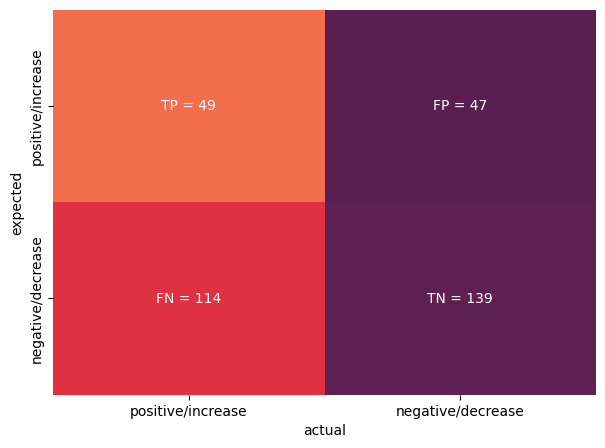

In [ ]:
#First, we cast the values representing the number of each each result to strings
#so they can be used as labels.
sTP = str(TP)
sFP = str(FP)
sTN = str(TN)
sFN = str(FN)

#vcm here is intended to stand for "Visual Confusion Matrix"
#as this is the variable we will be manipulating to generate the confusion matrix graph.

#This line is intended to reformat our earlier confusion matrix data
#into a pandas DataFrame, with labels attached for its rows and columns
vcm = pd.DataFrame(cm, index = ['positive/increase', 'negative/decrease'], columns = ['positive/increase', 'negative/decrease'])

#Here we assign the labels for each cell of the graph.
labels = np.array([['TP = ' + sTP, 'FP = ' + sFP], ['FN = ' + sFN, 'TN = ' + sTN]])

#Then setup the matplotlib figure and adjust the graph's size.
fig, ax = plt.subplots(figsize = (7, 5))

#And finally create the graph using a seaborn heatmap.
vcm = sn.heatmap(vcm, vmin = 0, vmax = 200, annot = labels, fmt = '', cbar = False)
vcm.set(xlabel = 'actual', ylabel = 'expected')